In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import random
from sklearn import linear_model, metrics, model_selection

tripadvisor_file = "tripadvisor_review.csv"
tripadvisor_data = pd.read_csv(tripadvisor_file)
#tripadvisor_data = tripadvisor_data.drop(["User ID"], axis=1)
tripadvisorColumnLst=[
    'User ID',
    'art galleries',
    'dance clubs',
    'juice bars',
    'restaurants',
    'museums',
    'resorts',
    'parks',
    'beaches',
    'theatres',
    'religious institutions',
]
tripadvisor_data.columns = tripadvisorColumnLst
tripadvisor_data.head()

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks,beaches,theatres,religious institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [3]:
tripadvisor_data.describe()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks,beaches,theatres,religious institutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


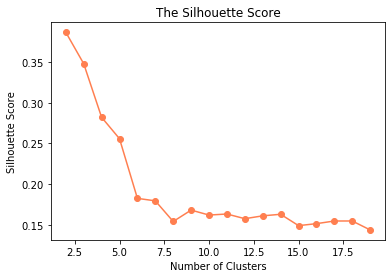

In [22]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
tripadvisor_data1=tripadvisor_data.drop('User ID', axis=1)
s_score = [] # create empty list
for i in range(2, 20): # for each value from 2 to 19:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tripadvisor_data1)
    pred=kmeans.predict(tripadvisor_data1)
    s_score.append(metrics.silhouette_score(tripadvisor_data1, pred))
plt.plot(range(2, 20), s_score, marker='o', c='coral')
plt.title('The Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(tripadvisor_data1)
prediction = kmeans.predict(tripadvisor_data1)
tripadvisor_data['Cluster'] = prediction
tripadvisor_data.head(30)

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks,beaches,theatres,religious institutions,Cluster
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,0
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,0
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2
5,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66,1
6,User 7,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22,1
7,User 8,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88,1
8,User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54,2
9,User 10,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12,1


In [7]:
tripadvisor_data['Cluster'].value_counts()

1    409
2    292
0    279
Name: Cluster, dtype: int64

In [8]:
def user_recommendationtripadvisor(firstid, secondid):
    
    # first user ID
    row_firstuser = tripadvisor_data.loc[tripadvisor_data['User ID']==firstid]
    cluster_firstuser = row_firstuser['Cluster'].item()
    
    # second user ID
    row_seconduser = tripadvisor_data.loc[tripadvisor_data['User ID']==secondid]
    cluster_seconduser = row_seconduser['Cluster'].item()
        
    if cluster_firstuser == cluster_seconduser:
        return 'Yes'
    else:
        return 'No'

In [9]:
user_recommendationtripadvisor('User 8','User 28')

'No'

In [10]:
user_recommendationtripadvisor('User 8','User 29')

'Yes'

In [11]:
google_file = "google_review_ratings.csv"
google_data = pd.read_csv(google_file)
google_data=google_data.drop(["Unnamed: 25"],axis=1)
googleColumnLst=[
    'User ID',
    'churches',
    'resorts',
    'beaches',
    'parks',
    'theatres',
    'museums',
    'malls',
    'zoo',
    'restaurants',
    'pubs/bars',
    'local services',
    'burger/pizza shops',
    'hotels/other lodgings',
    'juice bars',
    'art galleries',
    'dance clubs',
    'swimming pools',
    'gyms',
    'bakeries',
    'beauty & spas',
    'cafes',
    'view points',
    'monuments',
    'gardens',
]
google_data.columns = googleColumnLst
google_data.fillna(0,inplace=True)
local_services_mean = google_data['local services'][google_data['local services'] != '2\t2.']
google_data['local services'][google_data['local services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))
google_data['local services'] = google_data['local services'].astype('float64')
pd.set_option('display.max_columns', 30)
google_data.head(20)

<ipython-input-11-47182bbcd066>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data['local services'][google_data['local services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))


,User ID,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
1,User 2,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
2,User 3,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
3,User 4,0.0,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
4,User 5,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
5,User 6,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
6,User 7,0.0,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
7,User 8,0.0,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,1.70,1.68,1.69,1.71,1.74,0.60,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
8,User 9,0.0,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.0,0.0,0.5,0.00,0.0,0.0,0.0,0.0
9,User 10,0.0,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,2.63,1.69,1.67,1.67,1.70,0.74,0.59,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [12]:
google_data.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550071,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381643,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
google_data1=google_data.drop('User ID', axis=1)
#s_score = [] # create empty list
#for i in range(2, 20): # for each value from 2 to 19:
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#    kmeans.fit(google_data1)
#    pred=kmeans.predict(google_data1)
#    s_score.append(metrics.silhouette_score(google_data1, pred))
#s_score
inertias = []
for i in range(2,20): # run the algo 2-20 to plot inertias 
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) 
    model.fit(google_data1) # run mode for current k
    inertias.append(model.inertia_)
inertias

[183898.16027322086,
 165461.87774919314,
 150891.35400749132,
 141519.10574103874,
 134438.6380107617,
 129232.07272551837,
 124877.22106363937,
 121053.66567508862,
 116756.31751519897,
 113517.85099760264,
 110526.29605257306,
 107999.57415387403,
 105833.88916684753,
 103382.35628708104,
 101836.17944461064,
 99290.73847836335,
 98132.50891451004,
 95840.95806965267]

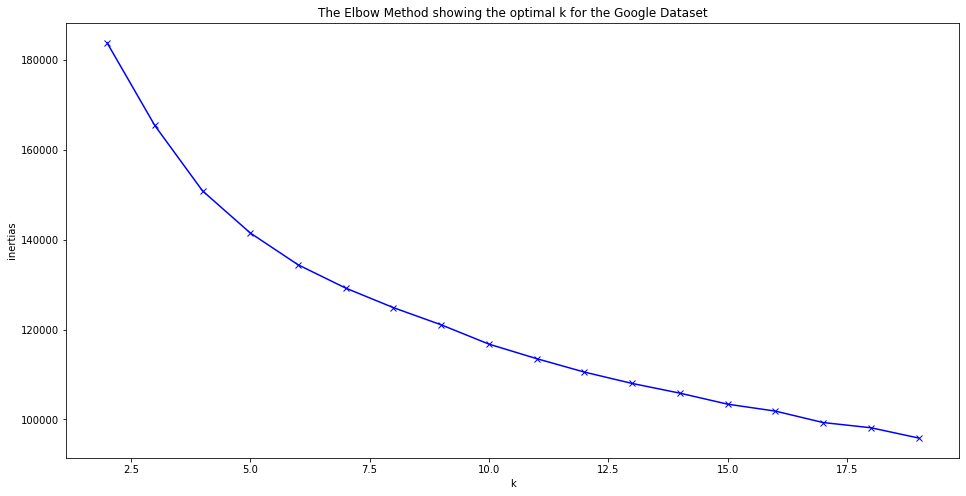

In [17]:
#plt.plot(range(2, 20), s_score, marker='o', c='coral')
#plt.title('The Silhouette Score')
#plt.xlabel('Number of Clusters')
#plt.ylabel('Silhouette Score')
#plt.show()
plt.figure(figsize=(16,8))
plt.plot(range(2,20), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.title('The Elbow Method showing the optimal k for the Google Dataset')
plt.show()

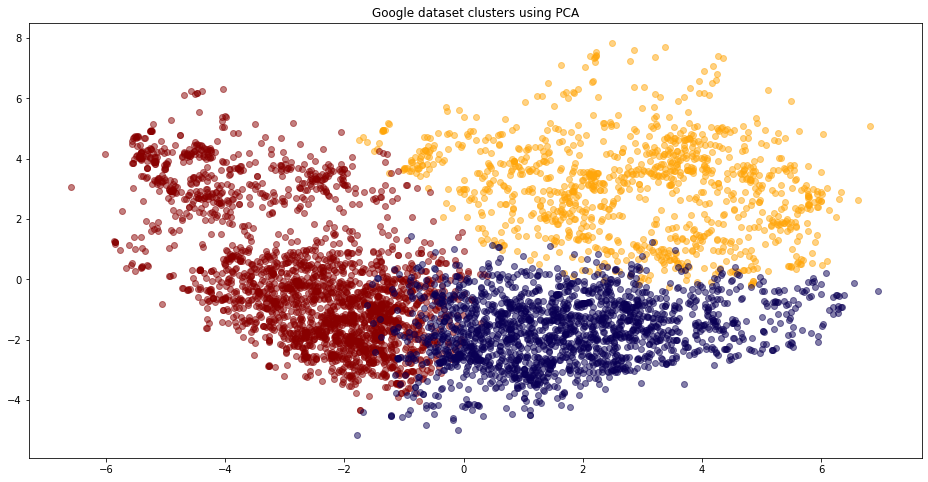

In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) # set clusters = 3
kmeans.fit(google_data1) # run model
clusterNames = kmeans.labels_
X = google_data1
y = clusterNames
target_names = [0,1,2]
pca = PCA(n_components=2) # reduce dimesions of the data using PCA and LDA
X_r = pca.fit(X).transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure(figsize=(16,8))
colors = ['#ffa60a', '#880000', '#0a0054',]
for color, i, target_name in zip(colors, range(0,4), target_names): # plot clusters
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.5,
                label=target_name)

plt.title('Google dataset clusters using PCA')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(google_data1)
prediction = kmeans.predict(google_data1)
google_data['Cluster'] = prediction
google_data.head(30)

,User ID,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,Cluster
0,User 1,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,2
1,User 2,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,2
2,User 3,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,2
3,User 4,0.0,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,2
4,User 5,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,2
5,User 6,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,2
6,User 7,0.0,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,2
7,User 8,0.0,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,1.70,1.68,1.69,1.71,1.74,0.60,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,2
8,User 9,0.0,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.00,0.0,0.5,0.00,0.0,0.0,0.0,0.0,2
9,User 10,0.0,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,2.63,1.69,1.67,1.67,1.70,0.74,0.59,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2


In [30]:
google_data['Cluster'].value_counts()

1    2464
2    1909
0    1083
Name: Cluster, dtype: int64

In [31]:
def user_recommendationgoogle(firstid, secondid):
    
    # first user ID
    row_firstuser = google_data.loc[google_data['User ID']==firstid]
    cluster_firstuser = row_firstuser['Cluster'].item()
    
    # second user ID
    row_seconduser = google_data.loc[google_data['User ID']==secondid]
    cluster_seconduser = row_seconduser['Cluster'].item()
        
    if cluster_firstuser == cluster_seconduser:
        return 'Yes'
    else:
        return 'No'

In [34]:
user_recommendationgoogle('User 8','User 28')

'Yes'

In [35]:
user_recommendationgoogle('User 8','User 200')

'No'